# Comparisons, Masks, and Boolean Logic

## Example: Counting Rainy Days

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd

In [9]:
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0
inches.shape

(365,)

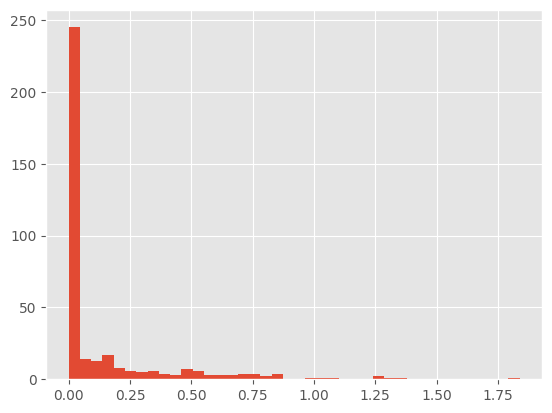

In [11]:
plt.hist(inches, 40)
plt.show()

## Comparison Operators as Ufuncs

In [14]:
x = np.arange(1, 6)

In [15]:
x < 3

array([ True,  True, False, False, False])

In [16]:
x > 3

array([False, False, False,  True,  True])

In [17]:
x <= 3

array([ True,  True,  True, False, False])

In [18]:
x >= 3

array([False, False,  True,  True,  True])

In [19]:
x != 3

array([ True,  True, False,  True,  True])

In [20]:
x == 3

array([False, False,  True, False, False])

In [21]:
(x * 2) == (x ** 2)

array([False,  True, False, False, False])

In [24]:
rng = np.random.default_rng(seed=1701)
x = rng.integers(10, size=(3, 4))
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]], dtype=int64)

In [25]:
x < 6

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

## Working with Boolean Arrays

### Counting Entries

In [26]:
np.count_nonzero(x < 6)

8

In [27]:
np.sum(x < 6)

8

In [28]:
np.sum(x < 6, axis=1)

array([3, 2, 3])

In [29]:
np.all(x > 0)

False

In [30]:
np.any(x < 0)

False

In [31]:
np.all( x < 10)

True

In [32]:
np.any(x == 7)

True

### Boolean Operators

In [35]:
np.sum((rainfall > 10) & (rainfall < 20))

10

In [38]:
np.sum(~((rainfall <= 10) | (rainfall >=20)))

10

In [52]:
print('Number days without rain:', np.sum(rainfall == 0))
print('Number days with rain:', np.sum(rainfall != 0))
print('Days with more than 10 mm:', np.sum(rainfall > 100))
print('Days with less than 5 mm:', np.sum(rainfall < 5))
print('Rainy days with < 5mm:', np.sum((rainfall > 0) & (rainfall < 5)))

Number days without rain: 215
Number days with rain: 150
Days with more than 10 mm: 47
Days with less than 5 mm: 225
Rainy days with < 5mm: 10


## Boolean Arrays as Masks

In [60]:
rainy_mask = (rainfall > 0)
days = np.arange(365)
summer_mask = (days > 172) & (days < 262)

print('Median precip on rainy days in 2014 (mm):', np.median(rainfall[rainy_mask]))
print('Median precip on summer days in 2014 (mm):', np.median(rainfall[summer_mask]))
print('Maximum precip on summer days in 2014 (mm):', np.max(rainfall[summer_mask]))
print('Median precip on non-summer rainy days in 2014 (mm):', np.max(rainfall[rainy_mask & ~summer_mask]))


Median precip on rainy days in 2014 (mm): 49.5
Median precip on summer days in 2014 (mm): 0.0
Maximum precip on summer days in 2014 (mm): 216
Median precip on non-summer rainy days in 2014 (mm): 467


## Using the Keywords and/or Versus the Operators $\&/|$

In [62]:
bool(42), bool(0)

(True, False)

In [63]:
bool(42 & 0)

False

In [64]:
bool(42 or 0)

True

In [65]:
42 or 0

42

In [66]:
bin(42)

'0b101010'

In [67]:
bin(59)

'0b111011'

In [68]:
bin(42 & 59)

'0b101010'

In [69]:
bin(42 | 59)

'0b111011'

In [73]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [74]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [76]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [77]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()